---
# Bike Sharing Case Study
---
A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

---

**The company wants to know**:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

---
### Objective:
- Build a model for the demand of shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features.

---
---

## Table of Content

* [Import the needed libraries](#import)
* [1. Reading and Understanding the Data](#dataread)
* [2. Data manipulation and cleaning](#datamanipulate)
    * [2.1 Derived data](#datamanipulate_deriveddata)
    * [2.2 Dropping unwanted columns](#datamanipulate_drop)
    * [2.3 Handle empty data](#datamanipulate_empty)
    * [2.4 Handle Outliers](#datamanipulate_outliers)
    * [2.5 Labelling categorical variables](#datamanipulate_labels)
* [3. Visualising the Data](#visual)
    * [3.1 Categorical variable with target variable](#visual_category)
    * [3.2 Numeric variables](#visual_numeric)
* [4. Data Preparation](#prepare)
* [5. Splitting the Data into Training and Testing Sets](#split)
* [6. Building model](#build)
    * [Best Model](#bestmodel)
* [7. Residual Analysis of the train data](#analysis)
* [8. Making Predictions Using the Final Model](#prediction)
* [9: Model Evaluation](#evaluate)
* [Conclusion](#conclusion)
---
---

<a id='import'></a>
## Import the needed libraries

In [1]:
# Import the necessary librarires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

---
---
<a id='dataread'></a>
## Step 1: Reading and Understanding the Data

In [2]:
# Load the dataset
bike_data = pd.read_csv('day.csv')

# Sample the dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Understanding the data dimensions
print("Shape : ",bike_data.shape)

Shape :  (730, 16)


> There are 16 features (columns) and 730 records (rows)

In [4]:
# Understanding the distribution of data in each column
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


> At a quick glance, there seems to be no outliers. We will understand more about outliers while visualizing the data.

In [5]:
# Understanding the meaning of each feature
with open('data_dictionary.txt') as f:
    contents = f.read()
    print(contents)

Dataset characteristics
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
License

In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


From the above details, we can make the below inference :
- **Numeric variables** : 'temp', 'atemp', 'hum', 'windspeed'
- **Categorical variables** : 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit' (though data type is numeric, the variables explain the classification)
- **'instant'** variable is a record index which can be considered as key column
- **'dteday'** variable is a date column
- Based on the problem statement, **'cnt'** is the *target variable*. 'casual' and 'registered' can be ignored as they are already considered in 'cnt' column

In [7]:
# Based on above understanding, creating below two variables for handy use
target_var = 'cnt'
numeric_vars = ['temp', 'atemp', 'hum', 'windspeed']
categoric_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

---
---
<a id='datamanipulate'></a>
## Step 2: Data manipulation and cleaning

<a id='datamanipulate_deriveddata'></a>
### 2.1 Derived data

In [8]:
# Let's introduce 'days' variable which indicates number of business days since day 1 of business
bike_data['days'] = (pd.to_datetime(bike_data['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


---
<a id='datamanipulate_drop'></a>
### 2.2 Dropping unwanted columns
- From `'dteday'`, we have month ('mnth'), weekday('weekday') and year ('yr') data. So we can safely drop 'dteday' column.
- `'instant'` is a key column and we do not need it for modelling. So we can safely drop 'instant' column.
- `'casual'` and `'registered'` corresponds to the outcome and it is already considered in `'cnt'` column. So we can safely drop those two columns.

In [9]:
# Based on the above explanation, dropping the columns
bike_data.drop(['dteday', 'instant', 'casual', 'registered'], axis=1, inplace=True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


---
<a id='datamanipulate_empty'></a>
### 2.3 Handle empty data

In [10]:
# Understanding the empty values in the data
bike_data.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days          0
dtype: int64

- There are no empty data. Hence no need to address empty data.

---
<a id='datamanipulate_outliers'></a>
### 2.4 Handle Outliers

Univariate analysis on the numeric columns will help to understand outliers

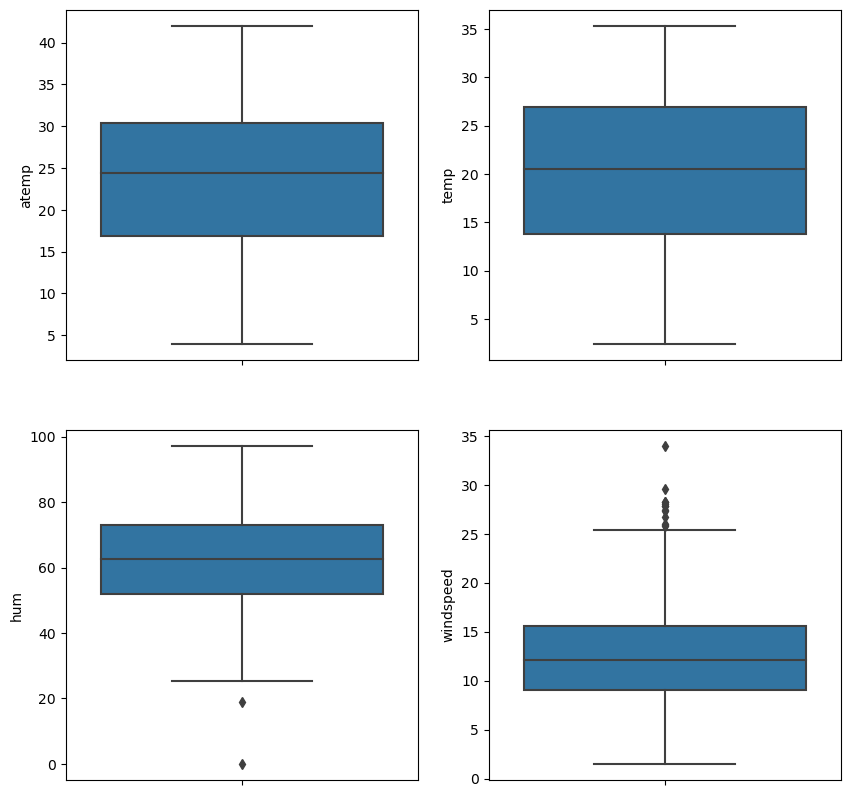

In [11]:
# Understand the outliers in the numeric columns
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
sns.boxplot(y = 'atemp', data = bike_data)
plt.subplot(2,2,2)
sns.boxplot(y = 'temp', data = bike_data)
plt.subplot(2,2,3)
sns.boxplot(y = 'hum', data = bike_data)
plt.subplot(2,2,4)
sns.boxplot(y = 'windspeed', data = bike_data)
plt.show()

- `hum` and `windspeed` have few outliers. Let's handle these two columns.

In [12]:
# Template function to calculate the theoretical maxmimum and minimum value of a data based on IQR
# data - Input
# return -> min and max val of that data
def max_min_val(data):
    # Divide data into 75% quantile and 25% quantile
    Q75, Q25 = np.percentile(data,[75,25])
    #Calculate Inter quantile range
    IQR = Q75 - Q25
    #Derive max and min value
    maxVal = Q75+(IQR*1.5)
    minVal = Q25-(IQR*1.5)
    return (minVal, maxVal)

In [13]:
# Remove the outliers for these two columns

# 1) hum
minVal, maxVal = max_min_val(bike_data.hum)
# Since the outlier is in the lower region, we will remove the data below the theoretical minimum
bike_data = bike_data[bike_data.hum >= minVal]

# 2) windspeed
minVal, maxVal = max_min_val(bike_data.windspeed)
# Since the outlier is in the upper region, we will remove the data above the theoretical maximum
bike_data = bike_data[bike_data.windspeed < maxVal]

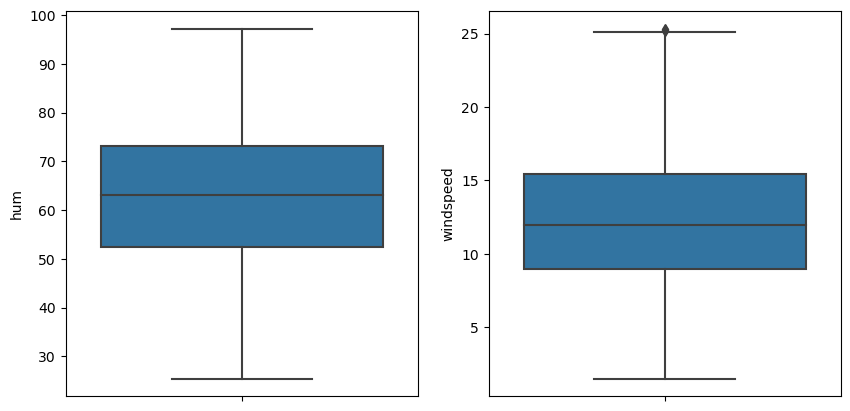

In [14]:
# Relook for the outliers after handling the two columns
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.boxplot(y = 'hum', data = bike_data)
plt.subplot(1,2,2)
sns.boxplot(y = 'windspeed', data = bike_data)
plt.show()

In [15]:
bike_data.shape

(716, 13)

- After outlier treatment, we have removed 14 records which is around 2% of initial data and it is acceptable.

---
<a id='datamanipulate_labels'></a>
### 2.5 Labelling categorical variables

In [16]:
print("Here are the categorical variable : ", categoric_vars)

Here are the categorical variable :  ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


In [17]:
# Let us look into the unique values of each categorical variable available in the dataset
for var in categoric_vars:
    print("Unique values in {0}  : {1}".format(var, str(bike_data[var].unique())))

Unique values in season  : [1 2 3 4]
Unique values in yr  : [0 1]
Unique values in mnth  : [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values in holiday  : [0 1]
Unique values in weekday  : [6 0 1 2 3 4 5]
Unique values in workingday  : [0 1]
Unique values in weathersit  : [2 1 3]


From the data dictionary it clear that,
- `season` has 4 values (1:spring, 2:summer, 3:fall, 4:winter)
- `weathersit` has 4 values. We can categorize them as (1:'good',2:'moderate',3:'bad',4:'severe')
- `mnth` has 12 values. We can categorize them as (1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec')
- `weekday` has 7 values. We can categorize them as (0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat')
- `holiday`, `yr`, `workingday` have 2 unique values. Creating labels for these features and generating dummies will again result in this same column. Hence, labels are not created and leaving it as it is.

Based on these understanding, let's create the labels.

In [18]:
# Label the season column
bike_data.season = bike_data.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
# Label the weathersit column
bike_data.weathersit = bike_data.weathersit.map({1:'good',2:'moderate',3:'bad',4:'severe'})
# Label the mnth column
bike_data.mnth = bike_data.mnth.map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
# Label the weekday column
bike_data.weekday = bike_data.weekday.map({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


In [19]:
# Relook into the unique values of each categorical variable available in the dataset
for var in categoric_vars:
    print("Unique values in {0}  : {1}".format(var, str(bike_data[var].unique())))

Unique values in season  : ['spring' 'summer' 'fall' 'winter']
Unique values in yr  : [0 1]
Unique values in mnth  : ['jan' 'feb' 'mar' 'apr' 'may' 'jun' 'jul' 'aug' 'sept' 'oct' 'nov' 'dec']
Unique values in holiday  : [0 1]
Unique values in weekday  : ['sat' 'sun' 'mon' 'tue' 'wed' 'thu' 'fri']
Unique values in workingday  : [0 1]
Unique values in weathersit  : ['moderate' 'good' 'bad']


We could also skip this step, but these labels helps in better understanding. Also it will be helpful when creating dummy labels later.

---
---

<a id='visual'></a>
## Step 3: Visualising the Data
<a id='visual_category'></a>
### 3.1 Categorical variable with target variable

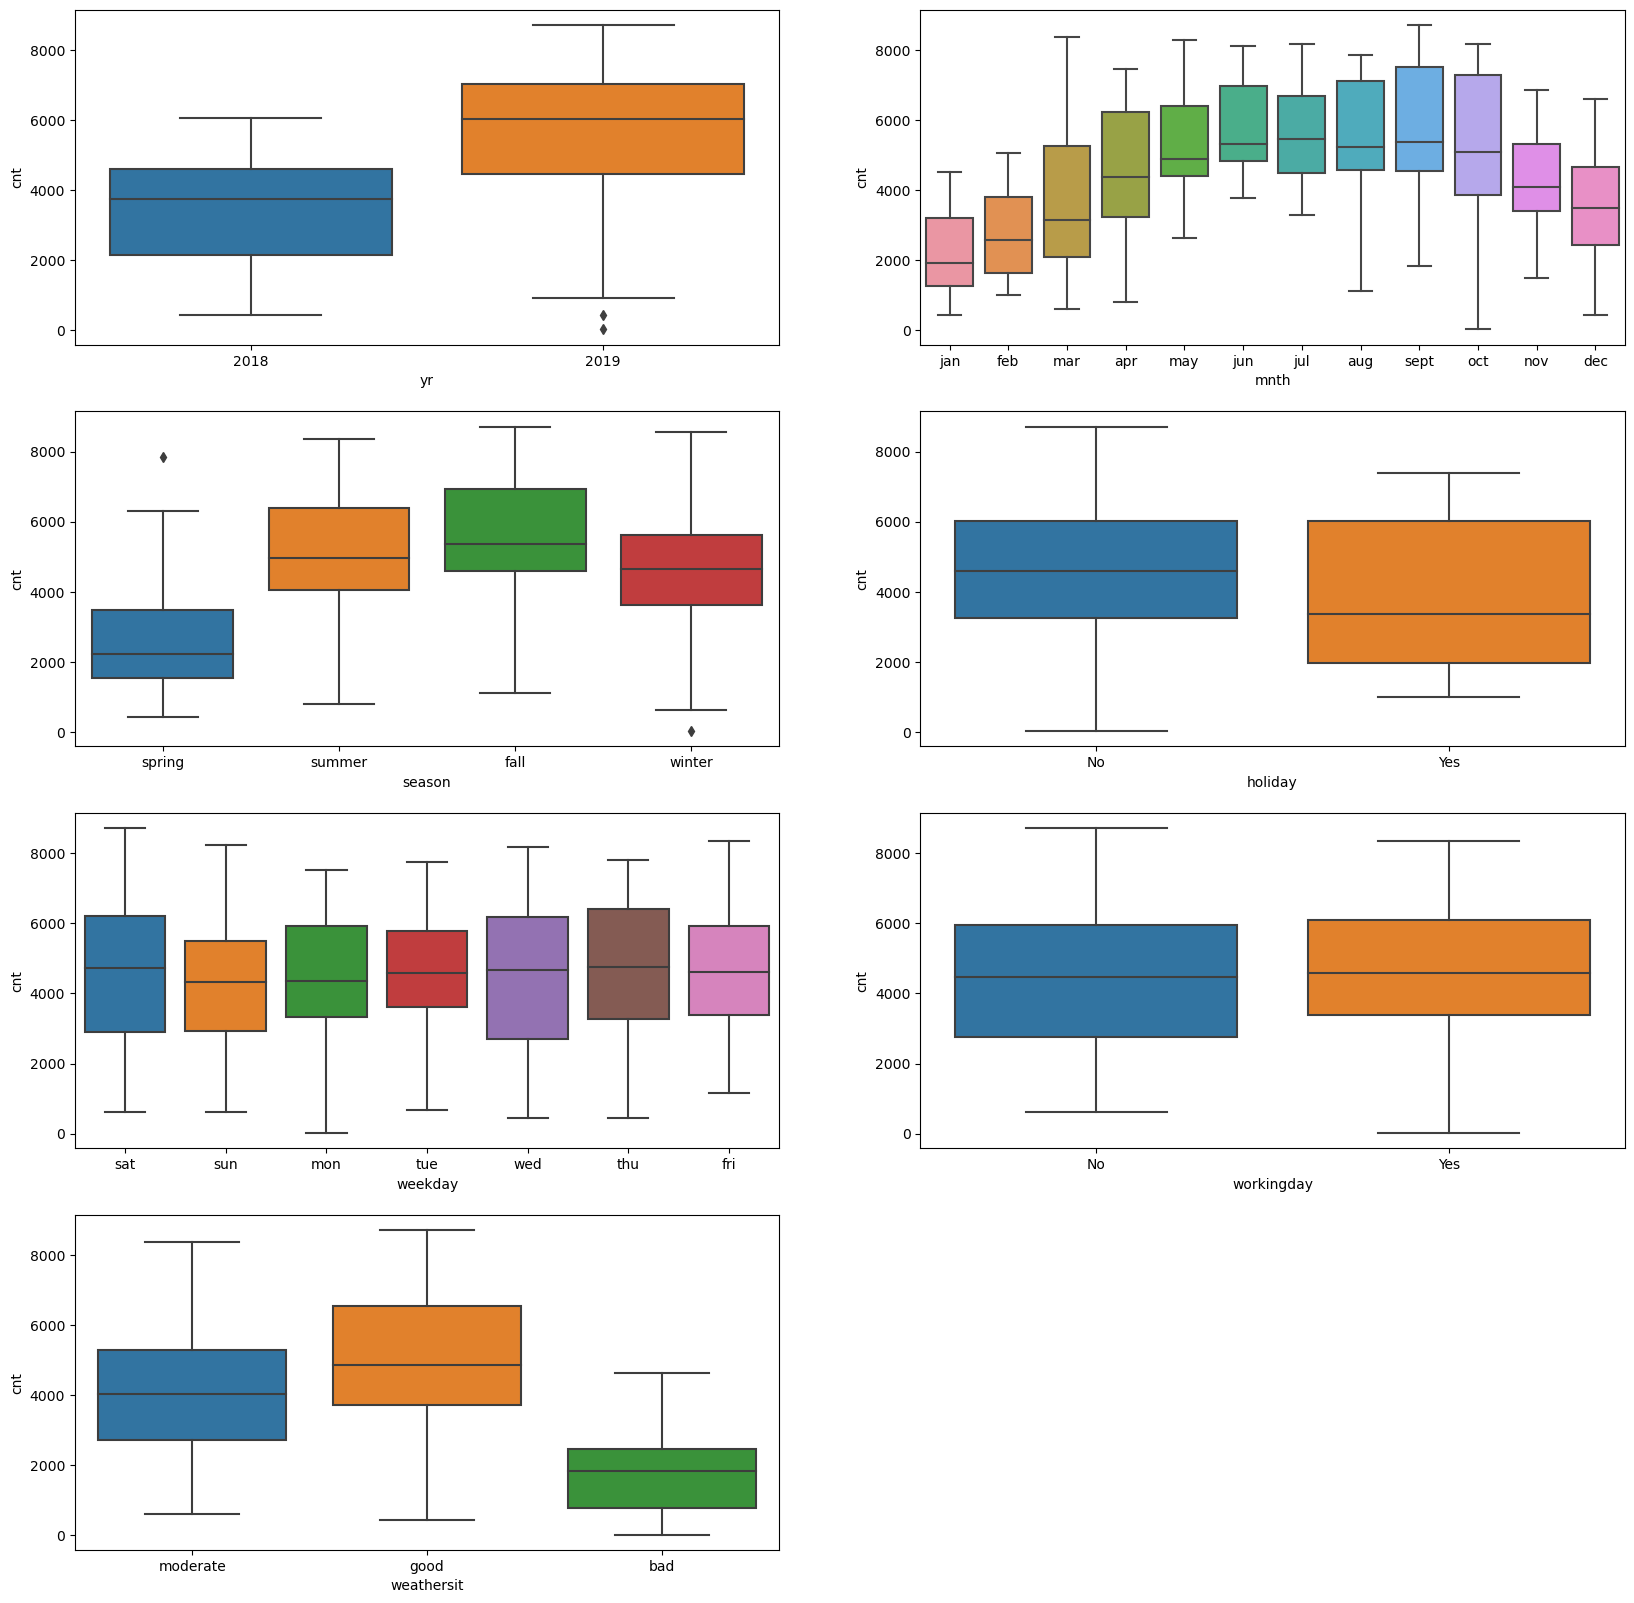

In [20]:
# Plot all the categorical variables with the target variable 'cnt'        
plt.figure(figsize=(20, 20))
plt.subplot(4,2,1)
ax = sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
ax.set_xticklabels(["2018","2019"]) # Changing labels for better interpretation -> yr : year (0: 2018, 1:2019)
plt.subplot(4,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(4,2,3)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(4,2,4)
ax = sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
ax.set_xticklabels(["No","Yes"]) # Changing labels for better interpretation -> holiday : weather day is a holiday or not
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(4,2,6)
ax = sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
ax.set_xticklabels(["No","Yes"]) # Changing labels for better interpretation -> workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.show()

**Inference**:
1) There is increase in demand for the rental bikes every year.
2) There is an incremental rise in demand till September month and then it declines till December. This might be due to the bad weather conditions in winter which is not suitable for driving bikes.
3) The demand is high during fall season which might be due to good weather conditions.
4) During holidays, there is a wide spread in demand and the median is less, which means that there is less demand.
5) There is no significant observation about week day, though Wednesday has a little bit more spread in demand.
6) There is no significant observation about working day, though non working day has a little bit more spread in demand.
7) When the weather is good, there is a significant rise in demand and when the weather is bad, there is significant decline in demand.

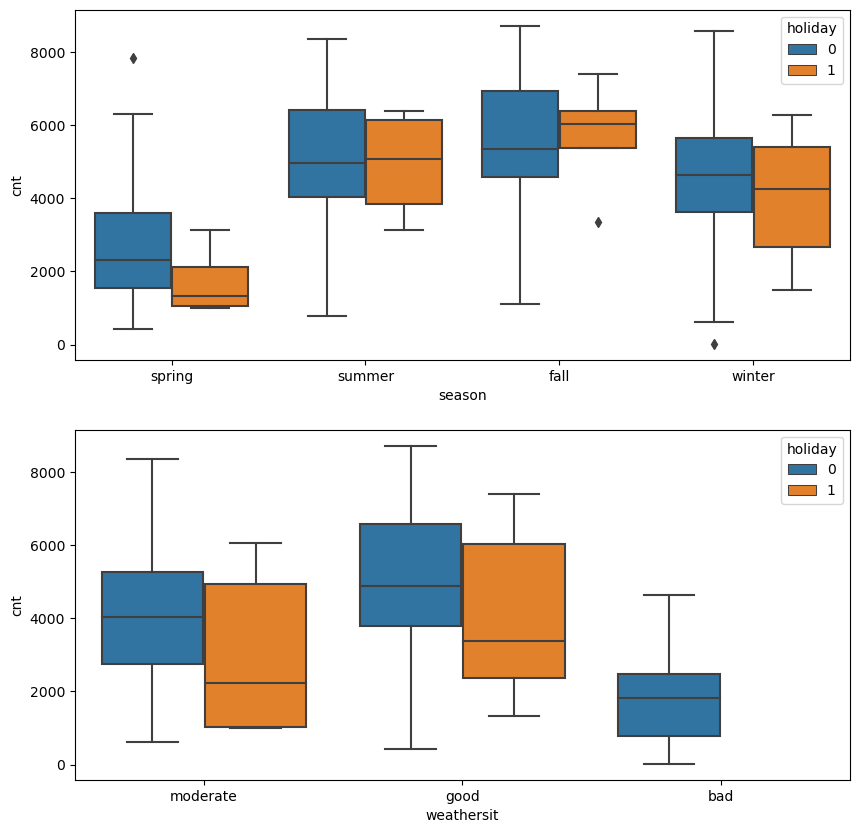

In [21]:
plt.figure(figsize = (10, 10))
plt.subplot(2,1,1)
sns.boxplot(x = 'season', y = 'cnt', hue = 'holiday', data = bike_data)
plt.subplot(2,1,2)
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'holiday', data = bike_data)
plt.show()

> - We can also observe few combinations of categorical variables impacting the target variable.

> - We can keep extending the combinations, but with these basic visualization, it is clear that there is a relation between the categorical variables and the target variable.

---

<a id='visual_numeric'></a>
### 3.2 Numeric variables

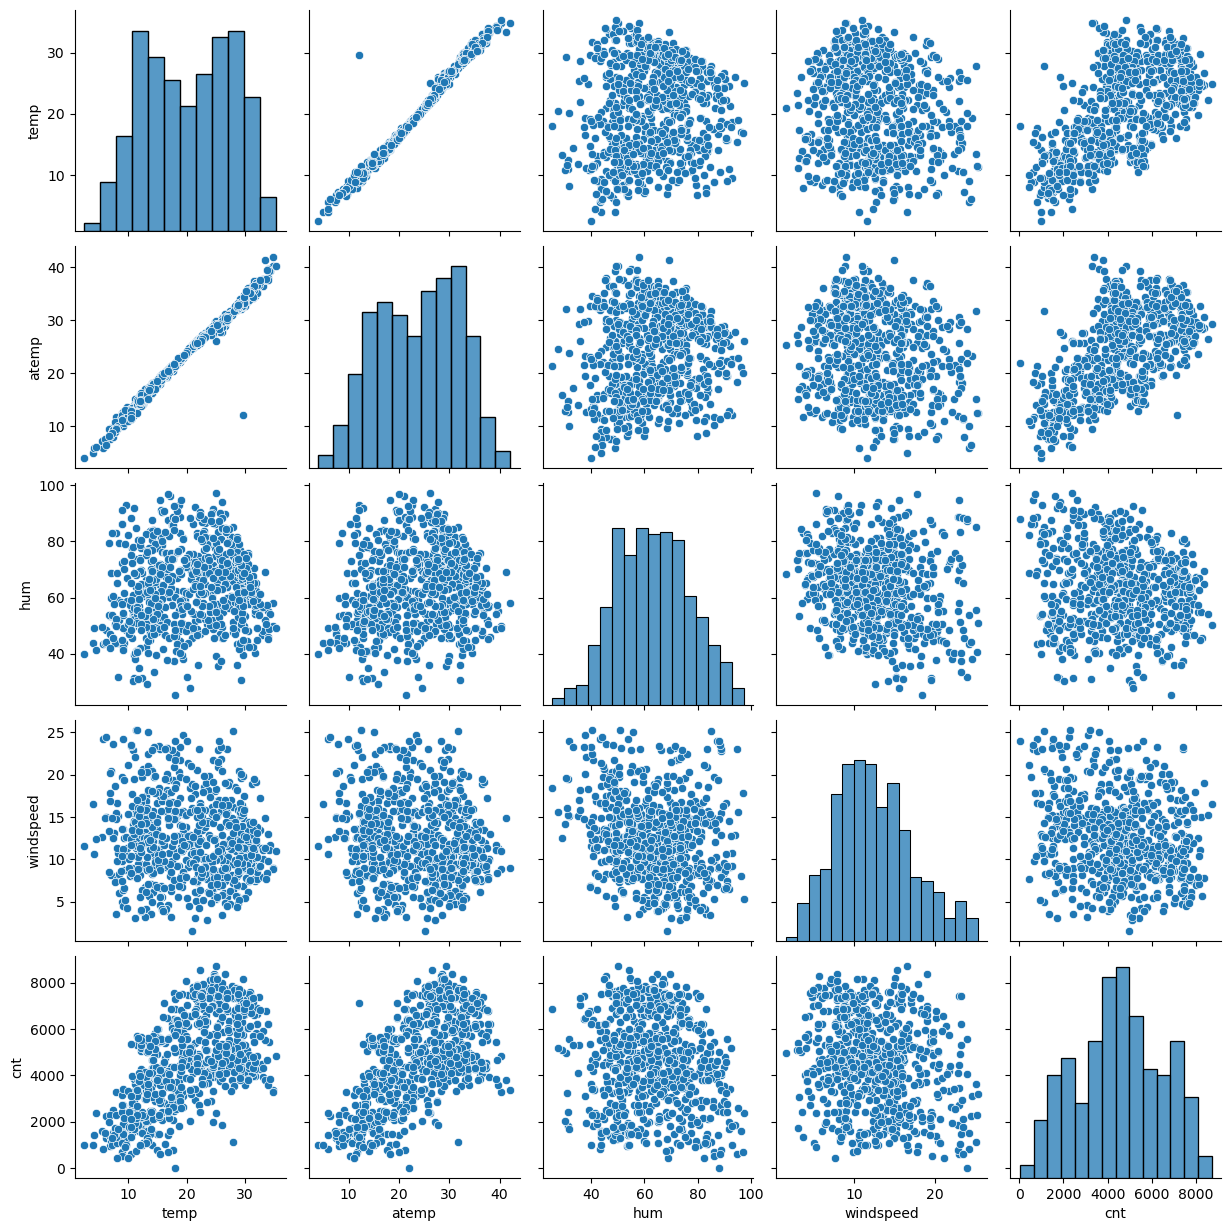

In [22]:
# Pairplot between numeric variables excluding target variable
numeric_vars = ['temp','atemp','hum','windspeed', 'cnt']
sns.pairplot(data = bike_data[numeric_vars])
plt.show()

<Axes: >

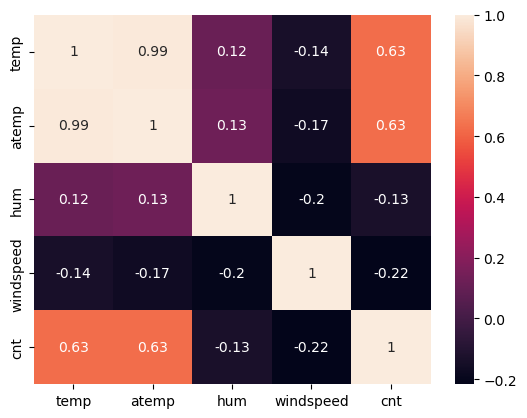

In [23]:
# Let's create heatmap to understand the correlation value betweem these variables
sns.heatmap(data=bike_data[numeric_vars].corr(), annot=True)

**Inference** :

From the pairplot and heatmap, we can see that
> - `'temp'` and `'atemp'` is highly correlated(0.99) . It is evident because both denotes temperature in C
> - `'cnt'` (target variable) has a good correlation with `'temp'` and `'atemp'`

Based on this, we can see that 'temp' and 'atemp' is almost duplicate. But let's keep both the rows for now.

- From the above analysis, we can see that the target variable has some *linear relationship with numeric variables* and *affected by categorical* variables as well. Let's proceed with modelling based on this data.

---
---

<a id='prepare'></a>
## Step 4: Data Preparation

In [24]:
#Sample the dataset
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


Let's create dummies for all the categorical variables except 0/1 variables ('yr', 'holiday', 'workingday')

In [25]:
# Set 'drop_first' as True to avoid additional variable since we can explain 'k' levels with 'k-1' dummies
bike_data = pd.get_dummies(data=bike_data,columns=['season','mnth','weekday'],drop_first=True)
# Set 'drop_first' as False since weathershit has 4 values in dictionary, but in data only 3 values are available.
# If we set 'drop_first' as True, then we will be missing 'severe' conditions while mapping in future.
# So to cover the additional level, we will set 'drop_first' as False
bike_data = pd.get_dummies(data=bike_data,columns=['weathersit'],drop_first=False)

In [26]:
# Sample the dataset
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,1,0,1,0


In [27]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 729
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   716 non-null    int64  
 1   holiday              716 non-null    int64  
 2   workingday           716 non-null    int64  
 3   temp                 716 non-null    float64
 4   atemp                716 non-null    float64
 5   hum                  716 non-null    float64
 6   windspeed            716 non-null    float64
 7   cnt                  716 non-null    int64  
 8   days                 716 non-null    int64  
 9   season_spring        716 non-null    uint8  
 10  season_summer        716 non-null    uint8  
 11  season_winter        716 non-null    uint8  
 12  mnth_aug             716 non-null    uint8  
 13  mnth_dec             716 non-null    uint8  
 14  mnth_feb             716 non-null    uint8  
 15  mnth_jan             716 non-null    uin

- Now, the data is converted to a clean format suitable for analysis

---
---

<a id='split'></a>
## Step 5: Splitting the Data into Training and Testing Sets

We need to split the given dataset into train and test sets

In [28]:
# We specify random_state so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 42)

In [29]:
print("Shape of train set : ", df_train.shape)
print("Shape of test set : ", df_test.shape)

Shape of train set :  (501, 32)
Shape of test set :  (215, 32)


In [30]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,...,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,0.512974,0.031936,0.664671,20.447555,23.863091,62.469866,12.592461,4553.624750,370.267465,0.235529,...,0.083832,0.143713,0.155689,0.147705,0.151697,0.131737,0.129741,0.023952,0.652695,0.323353
std,0.500331,0.176006,0.472577,7.498304,8.138932,13.661121,4.879200,1930.334667,210.064029,0.424753,...,0.277413,0.351149,0.362922,0.355162,0.359085,0.338542,0.336354,0.153053,0.476590,0.468224
min,0.000000,0.000000,0.000000,2.424346,3.953480,25.416700,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.008347,17.013350,51.875000,9.000579,3267.000000,190.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.807500,24.652700,62.208300,12.000236,4648.000000,376.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,26.923347,30.556050,72.291700,15.500986,5976.000000,550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,94.958300,25.333236,8714.000000,729.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Min Max scaling:

- Here we can see that except for 'cnt' and 'days' variables, all the columns have small values. So it is extremely important to rescale the variables so that they have a comparable scale.

- We will use **Min-Max scaling** for this purpose.

In [31]:
# Apply scaler() to all the columns except categorical variables which are 0/1 columns
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days']

# Create a min max scaler object
scaler = MinMaxScaler()
# Since we need to learn and apply the learning, we use fit_transform()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [32]:
# Sample the training data
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
28,0,0,0,0.171197,0.174654,0.571704,0.345706,0.123792,0.038409,1,...,0,0,1,0,0,0,0,0,1,0
43,0,0,0,0.320723,0.321653,0.292234,0.670454,0.180281,0.058985,1,...,0,0,0,1,0,0,0,0,1,0
42,0,0,0,0.203567,0.201994,0.417017,0.508763,0.166820,0.057613,1,...,0,0,1,0,0,0,0,0,1,0
76,0,0,1,0.599187,0.587981,0.389767,0.586494,0.370110,0.104252,1,...,0,0,0,0,0,0,0,0,1,0
172,0,0,1,0.840090,0.806955,0.651888,0.421320,0.515992,0.235940,0,...,0,0,0,0,0,0,1,0,1,0


In [33]:
# Relook into the data distribution to see if the min/max scaling has affected the data
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,...,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,0.512974,0.031936,0.664671,0.547751,0.522681,0.532820,0.465414,0.521356,0.507911,0.235529,...,0.083832,0.143713,0.155689,0.147705,0.151697,0.131737,0.129741,0.023952,0.652695,0.323353
std,0.500331,0.176006,0.472577,0.227884,0.213669,0.196445,0.204725,0.222082,0.288154,0.424753,...,0.277413,0.351149,0.362922,0.355162,0.359085,0.338542,0.336354,0.153053,0.476590,0.468224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.352054,0.342857,0.380467,0.314704,0.373332,0.260631,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.558691,0.543410,0.529059,0.440565,0.532214,0.515775,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.744560,0.698389,0.674057,0.587452,0.684998,0.754458,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---
---

<a id='build'></a>
## Step 6: Building model

There are multiple approaches to build a model.
1) Start with one variable and keep adding the features.
2) Start with all the variables and keep removing the features.
3) Use RFE to find the top 'n' features, and manually select the features to build the model.

> - Here we have 31 features. Let us use **RFE** approach for solving the problem.

#### RFE approach:

In [34]:
y_train = df_train.pop('cnt')
X_train = df_train

In [35]:
# Create a linear regression object for RFE method
lr = LinearRegression()
lr.fit(X_train, y_train)

# We have 31 features. Let's eliminate half of the features (31/2=15.5 (~15)) by RFE method.
rfe = RFE(lr, n_features_to_select=16)
rfe = rfe.fit(X_train, y_train)

In [36]:
# Let us look into the column selected by RFE and its ranking 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 8),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 16),
 ('season_winter', True, 1),
 ('mnth_aug', False, 3),
 ('mnth_dec', False, 4),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 15),
 ('mnth_jun', False, 6),
 ('mnth_mar', False, 12),
 ('mnth_may', False, 2),
 ('mnth_nov', False, 5),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 7),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 9),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 13),
 ('weekday_wed', False, 14),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [37]:
# Let's print the columns of interest and not interest
rfe_cols = X_train.columns[rfe.support_]
print('Top 16 features selected by RFE :', rfe_cols.values)
rfe_not_cols = X_train.columns[~rfe.support_]
print('\nOther features :', rfe_not_cols.values)

Top 16 features selected by RFE : ['yr' 'workingday' 'temp' 'hum' 'windspeed' 'days' 'season_spring'
 'season_winter' 'mnth_feb' 'mnth_jan' 'mnth_oct' 'mnth_sept'
 'weekday_sat' 'weathersit_bad' 'weathersit_good' 'weathersit_moderate']

Other features : ['holiday' 'atemp' 'season_summer' 'mnth_aug' 'mnth_dec' 'mnth_jul'
 'mnth_jun' 'mnth_mar' 'mnth_may' 'mnth_nov' 'weekday_mon' 'weekday_sun'
 'weekday_thu' 'weekday_tue' 'weekday_wed']


### Building model using statsmodel, for the detailed statistics

In [38]:
# Let's create a template function for building the model, printing the summary and the VIF values.
# X_train : Independent variables
# y_train : Target variable
# return -> model created using the inputs

def build_model_and_stats(X_train, y_train):
    
    # Adding a constant variable
    X_train_sm = sm.add_constant(X_train)
    # Running the linear model
    lm = sm.OLS(y_train, X_train_sm).fit()
    #Let's see the summary of our linear model
    print(lm.summary())
    
    # Calculate the VIFs for the model
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print('\n-----')
    print(vif)
    print('\n-----')
    
    return(lm)

---

### Model 1:

- Include all the 16 variables selected using RFE method.
- ('yr' 'workingday' 'temp' 'hum' 'windspeed' 'days' 'season_spring'
 'season_winter' 'mnth_feb' 'mnth_jan' 'mnth_oct' 'mnth_sept'
 'weekday_sat' 'weathersit_bad' 'weathersit_good' 'weathersit_moderate')

In [39]:
# Creating X_test_original dataframe with RFE selected variables
X_train_original = X_train[rfe_cols]

# Create a model
lm_1 = build_model_and_stats(X_train_original, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     171.6
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          6.57e-183
Time:                        16:41:22   Log-Likelihood:                 504.84
No. Observations:                 501   AIC:                            -977.7
Df Residuals:                     485   BIC:                            -910.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1824    

From p-statistics (significance of the feature) and VIF (denoting multicollinearity), we can eliminate further features based on the below approach.

| p-statistics | VIF | Action |
|:-------------|:-----|:------|
| High | High  | Drop |
| Low | High | Remove these features first |
| High | Low | Remove these after handling the above states|
| Low | Low | Use |

>Note: `p-statistics > 0.05` is **high** and `VIF > 5` is **high**

Based on the above approach, we can keep improvising the model.

**Inference:**

| Inference | Comment |
|:------|:--------|
| Adjusted R2 score | **0.837** |
| Variable to update | `weathersit_good` variable has low p-statistics(0) and high VIF(38.60). Let's remove this variable |

---

### Model 2:

In [40]:
# Drop 'weathersit_good' based on the previous inference
X_train = X_train_original.drop(['weathersit_good'], axis=1)

# Create a model
lm_2 = build_model_and_stats(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     171.6
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          6.57e-183
Time:                        16:41:22   Log-Likelihood:                 504.84
No. Observations:                 501   AIC:                            -977.7
Df Residuals:                     485   BIC:                            -910.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3484    

**Inference:**

| Inference | Comment |
|:------|:--------|
| Adjusted R2 score | **0.837** |
| Variable to update | `days` variable has low p-statistics(0) and high VIF(58.58). Let's remove this variable |

---

### Model 3:

In [41]:
# Drop 'weathersit_good', days' based on the previous inference
X_train = X_train_original.drop(['weathersit_good', 'days'], axis=1)

# Create a model
lm_3 = build_model_and_stats(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     175.8
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          6.22e-180
Time:                        16:41:22   Log-Likelihood:                 495.02
No. Observations:                 501   AIC:                            -960.0
Df Residuals:                     486   BIC:                            -896.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3059    

**Inference:**

| Inference | Comment |
|:------|:--------|
| Adjusted R2 score | **0.830** |
| Variable to update | `hum` variable has low p-statistics(0) and high VIF(13.77). Let's remove this variable  |

---

### Model 4:

In [42]:
# Drop 'weathersit_good', 'days', 'hum' based on the previous inference
X_train = X_train_original.drop(['weathersit_good', 'days', 'hum'], axis=1)

# Create a model
lm_4 = build_model_and_stats(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     182.0
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          1.91e-177
Time:                        16:41:23   Log-Likelihood:                 486.37
No. Observations:                 501   AIC:                            -944.7
Df Residuals:                     487   BIC:                            -885.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2509    

**Inference:**

| Inference | Comment |
|:------|:--------|
| Adjusted R2 score | **0.825** |
| Variable to update | `temp` variable has low p-statistics(0) and high VIF(6.26). Let's remove this variable  |

---

### Model 5:

In [43]:
# Drop 'weathersit_good', 'days', 'hum', 'temp' based on the previous inference
X_train = X_train_original.drop(['weathersit_good', 'days', 'hum', 'temp'], axis=1)

# Create a model
lm_5 = build_model_and_stats(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     148.2
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          4.39e-154
Time:                        16:41:23   Log-Likelihood:                 428.12
No. Observations:                 501   AIC:                            -830.2
Df Residuals:                     488   BIC:                            -775.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5030    

**Inference:**

| Inference | Comment |
|:------|:--------|
| Adjusted R2 score | **0.779** |
| Variable to update | Removing `temp` variable has reduced the R2 score significantly, so let's add it again. From model 4 summary, we can see `windspeed` variable has high VIF(5.55) and low p-statistics(0). Let us remove this variable  |

---

### Model 6:

In [44]:
# Drop 'weathersit_good', 'days', 'hum', 'windspeed' based on the previous inference
X_train = X_train_original.drop(['weathersit_good', 'days', 'hum', 'windspeed'], axis=1)

# Create a model
lm_6 = build_model_and_stats(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     193.3
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          1.10e-176
Time:                        16:41:23   Log-Likelihood:                 481.82
No. Observations:                 501   AIC:                            -937.6
Df Residuals:                     488   BIC:                            -882.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2162    

**Inference:**

| Inference | Comment |
|:------|:--------|
| Adjusted R2 score | **0.822** |
| Variable to update | `mnth_feb` variable has high p-statistics(0.89) and low VIF(1.87). Let's remove this variable  |

---

### Model 7:

In [45]:
# Drop 'weathersit_good', 'days', 'hum', 'windspeed', 'mnth_feb' based on the previous inference
X_train = X_train_original.drop(['weathersit_good', 'days', 'hum', 'windspeed', 'mnth_feb'], axis=1)

# Create a model
lm_7 = build_model_and_stats(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     211.3
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          7.45e-178
Time:                        16:41:23   Log-Likelihood:                 481.81
No. Observations:                 501   AIC:                            -939.6
Df Residuals:                     489   BIC:                            -889.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2165    

**Inference:**

| Inference | Comment |
|:------|:--------|
| Adjusted R2 score | **0.822** |
| Variable to update | `season_winter` variable has high p-statistics(0.345) and low VIF(1.91). Let's remove this variable|

---

### Model 8:

In [46]:
# Drop 'weathersit_good', 'days', 'hum', 'windspeed', 'mnth_feb', 'season_winter' based on the previous inference
X_train = X_train_original.drop(['weathersit_good', 'days', 'hum', 'windspeed', 'mnth_feb', 'season_winter'], axis=1)

# Create a model
lm_8 = build_model_and_stats(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     232.4
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          7.42e-179
Time:                        16:41:23   Log-Likelihood:                 481.35
No. Observations:                 501   AIC:                            -940.7
Df Residuals:                     490   BIC:                            -894.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2311    

**Inference:**

| Inference | Comment |
|:------|:--------|
| Adjusted R2 score | **0.822** |
| Variable to update | `mnth_jan` variable has high p-statistics(0.185) and low VIF(1.61). Let's remove this variable|

---

<a id='lm_9'></a>
### Model 9:

In [47]:
# Drop 'weathersit_good', 'days', 'hum', 'windspeed', 'mnth_feb', 'season_winter', 'mnth_jan' based on the previous inference
X_train = X_train_original.drop(['weathersit_good', 'days', 'hum', 'windspeed', 'mnth_feb', 'season_winter', 'mnth_jan'], axis=1)

# Create a model
lm_9 = build_model_and_stats(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     257.6
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          1.08e-179
Time:                        16:41:23   Log-Likelihood:                 480.45
No. Observations:                 501   AIC:                            -940.9
Df Residuals:                     491   BIC:                            -898.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2278    

**Inference:**

| Inference | Comment |
|:------|:--------|
| Adjusted R2 score | **0.822** |
| Variable to update | All the independent variables are significant and there is acceptable multicollinearity. No need to remove any more variables|

---

#### Can some other predictors help?

- Till now, 9th model looks overall good. These are the predictors used for the model ('temp', 'workingday','yr', 'weekday_sat','weathersit_moderate', 'season_spring', 'mnth_sept', 'mnth_oct', 'weathersit_bad')

In [48]:
# Let's look into variables which were not included in RFE apporach.
print("Other variables: ", rfe_not_cols.values)

Other variables:  ['holiday' 'atemp' 'season_summer' 'mnth_aug' 'mnth_dec' 'mnth_jul'
 'mnth_jun' 'mnth_mar' 'mnth_may' 'mnth_nov' 'weekday_mon' 'weekday_sun'
 'weekday_thu' 'weekday_tue' 'weekday_wed']


From **business perspective**, it will be helpful if we can understand the impact of `'holiday'` so that the management can take necessary actions on those days.

- Let's create few more models using `'holiday'`

---

### Model 10:

In [49]:
# Based on the above inference, let's add 'holiday' to the predictors from lm_9
X_train = df_train[['holiday','temp', 'workingday', 'yr', 'weekday_sat','weathersit_moderate', 'season_spring', 'mnth_sept', 'mnth_oct', 'weathersit_bad']]

# Create a model
lm_10 = build_model_and_stats(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     233.5
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          2.97e-179
Time:                        16:41:24   Log-Likelihood:                 482.29
No. Observations:                 501   AIC:                            -942.6
Df Residuals:                     490   BIC:                            -896.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2364    

**Inference:**

| Inference | Comment |
|:------|:--------|
| Adjusted R2 score | **0.823**. Adding `holiday` has improved the adjusted R2 score by a negligible 0.001. |
| Variable to update |  We can also see that `holiday` has a low significance (0.058). But for experimentation, let's keep this variable and remove `workingday` which has high VIF(4.45)|

---

### Model 11:

In [50]:
# Drop 'workingday' based on the previous inference
X_train = df_train[['holiday','temp', 'yr', 'weekday_sat','weathersit_moderate', 'season_spring', 'mnth_sept', 'mnth_oct', 'weathersit_bad']]

# Create a model
lm_11 = build_model_and_stats(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     250.2
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          4.06e-177
Time:                        16:41:24   Log-Likelihood:                 474.38
No. Observations:                 501   AIC:                            -928.8
Df Residuals:                     491   BIC:                            -886.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2712    

**Inference:**

| Inference | Comment |
|:------|:--------|
| Adjusted R2 score | **0.818** |
| Variable to update | `weekday_sat` has less significance value(0.717). Let's remove this variable. |

---

<a id='lm_12'></a>
### Model 12:

In [51]:
# Drop 'workingday', 'weekday_sat' based on the previous inference
X_train = df_train[['holiday','temp', 'yr','weathersit_moderate', 'season_spring', 'mnth_sept', 'mnth_oct', 'weathersit_bad']]

# Create a model
lm_12 = build_model_and_stats(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     281.9
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          2.50e-178
Time:                        16:41:24   Log-Likelihood:                 474.31
No. Observations:                 501   AIC:                            -930.6
Df Residuals:                     492   BIC:                            -892.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2721    

**Inference:**

| Inference | Comment |
|:------|:--------|
| Adjusted R2 score | **0.818** |
| Variable to update | All the independent variables are significant and there is acceptable multicollinearity. No need to remove any more variables. |

---

<a id='bestmodel'></a>
### Best model:

Based on the above experimentation of different models, `lm_9` and `lm_12` both are good models. Let's compare these two models

| Model | Approach | No. of Predictors | Prob(F-stat) | Adjusted R2 score | Maximum VIF | Comment |
|:------|:---------|:------------------|:-------------|:------------------|:-------------|:--------|
| [`lm_9`](#lm_9) | RFE approach | 9 | 0 | 0.822 |  temp (4.57) | R2 score is high, but the predictors are more and multicollinearity is acceptable but still higher than lm_12 |
| [`lm_12`](#lm_12) | RFE approach + manual selection| 8 | 0 | 0.818 | temp (2.3) | R2 score is a negligible(0.04) less than lm_9 but the trade off is predictors are less and multicollinearity is significantly lesser than lm_9|

- Also, 7 predictors are common in these two models.
- lm_9 has `'workingday'` and `'weekday_sat'` whereas lm_12 has `'holiday'`. Let's understand these three variables a bit more.

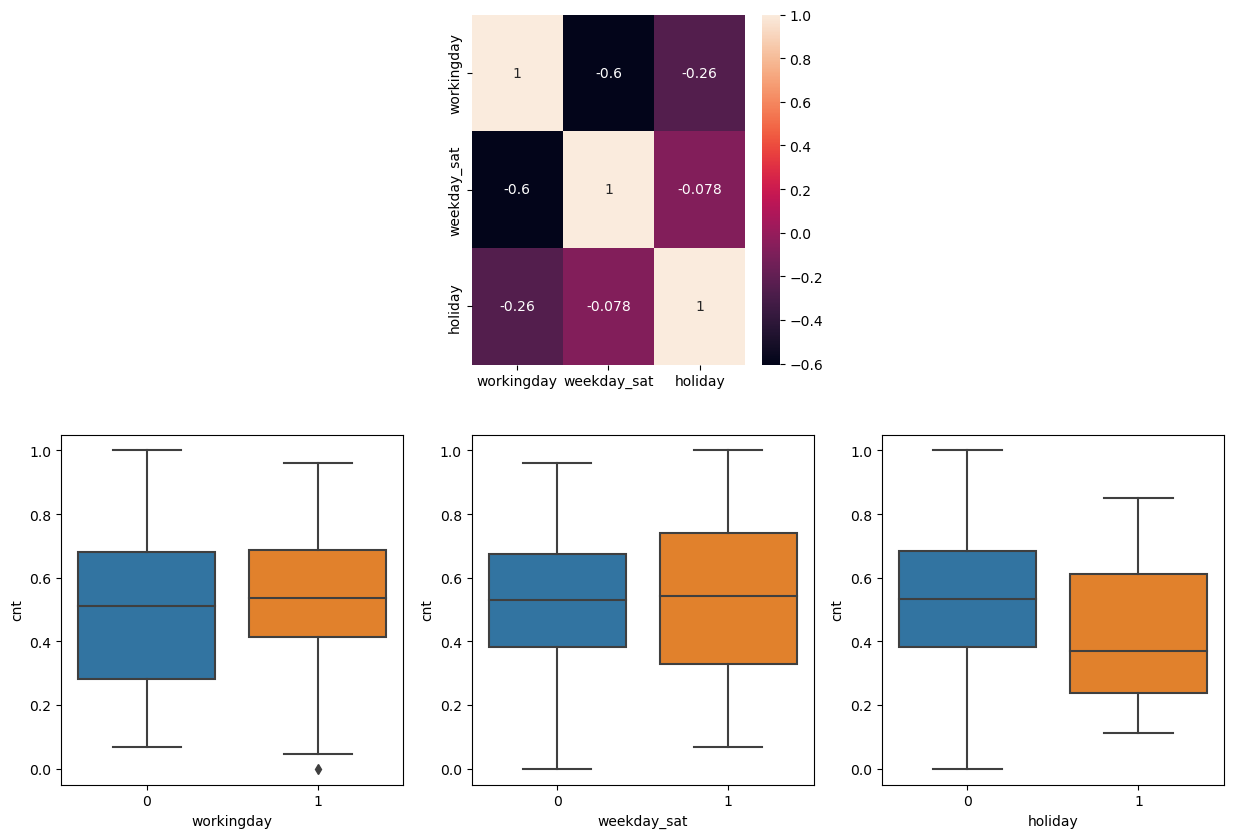

In [52]:
# Plot relationships between these variables
plt.figure(figsize=(15, 10))
plt.subplot(2,3,2)
sns.heatmap(data = df_train[['workingday','weekday_sat','holiday']].corr(), annot=True)
plt.subplot(2,3,4)
sns.boxplot(x = df_train['workingday'], y = y_train)
plt.subplot(2,3,5)
sns.boxplot(x = df_train['weekday_sat'], y = y_train)
plt.subplot(2,3,6)
sns.boxplot(x = df_train['holiday'], y = y_train)
plt.show()

- We can see that `'workingday'` and `'weekday_sat` have a good negative correlation.
- We can see that `'holiday'` and `'workingday'` have negative correlation.
- We can see that median is having significant difference for `'holiday'` than those of `'workingday'` and `'weekday_sat`.
---

With these information from analysis table and plots, we can safely consider `lm_12` as better model than `lm_9` due to the following reasons:
1) **Less** predictor variables.
2) **Less** multicollinearity among predictors.
3) **Negligible(0.04)** reduction in adjusted R2 score.
4) Median of `'holiday'` has a **significant** difference compared to those of `'workingday'` and `'weekday_sat`. So `'holiday'` could have a better chance of explaining about the number of users.
5) `'holiday'` vs `'workingday'` and `'weekday_sat'` have a **decent** negative correlation.

In [53]:
# Storing the best predictors in a separate variable
best_predictors = ['temp', 'yr', 'holiday','weathersit_moderate', 'season_spring', 'mnth_sept', 'mnth_oct', 'weathersit_bad']
print("Best predictors : ", best_predictors)

Best predictors :  ['temp', 'yr', 'holiday', 'weathersit_moderate', 'season_spring', 'mnth_sept', 'mnth_oct', 'weathersit_bad']


In [54]:
# Create a best model object for Linear regression model
best_model = LinearRegression()
# Select the training data belonging to best predictors
X_train = df_train[best_predictors]
# Create the model
best_model.fit(X_train, y_train)
print("Intercept    : ", best_model.intercept_)
print("Coefficients : ", best_model.coef_)

Intercept    :  0.27214083391522237
Coefficients :  [ 0.35133392  0.23070229 -0.08847071 -0.07899081 -0.16692924  0.09445935
  0.07637655 -0.34278712]


---
---
<a id='analysis'></a>
## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

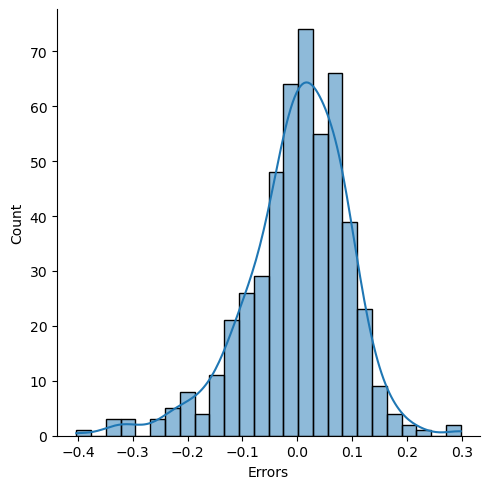

Residual error mean :  -7.53444767210685e-17


In [55]:
# Predict the output based on the best model
y_train_pred = best_model.predict(X_train)

# Calculate the residual error
res_error = y_train - y_train_pred

# Plot the residual error
sns.displot(res_error, kde=True)
# X-label
plt.xlabel('Errors')
plt.show()

# Print the residual error mean
print("Residual error mean : ", res_error.mean())

> - It is clear that the residual errors is almost *normally distributed with a mean 0*

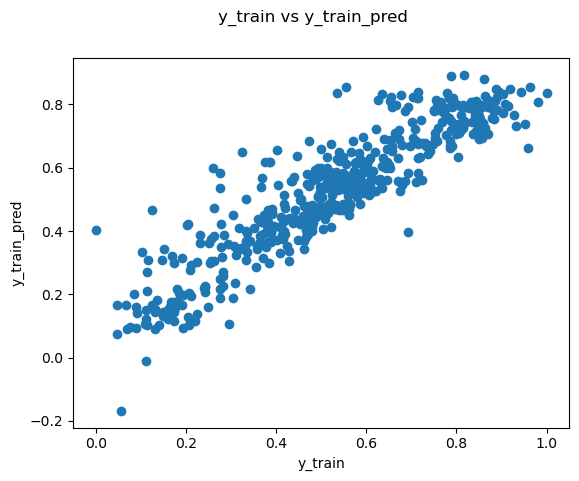

R2 score for test data:  0.8209207547489306


In [56]:
# Plotting y_train and y_train_pred to understand the spread
plt.scatter(y_train, y_train_pred)
plt.suptitle('y_train vs y_train_pred')
plt.xlabel('y_train')
plt.ylabel('y_train_pred')
plt.show()

# Find out the R squared value between test and predicted test data sets.
print("R2 score for test data: ", r2_score(y_true=y_train, y_pred=y_train_pred))

> - R2 score is fairly high **0.82**
> - The residual errors do not have significant deviation in spread of error values.

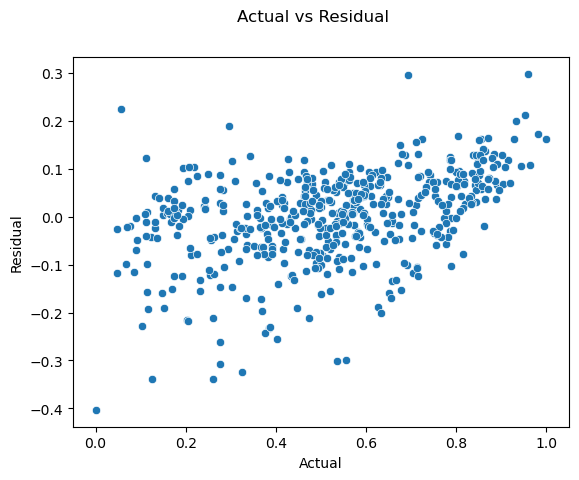

In [57]:
# Look if the error term is having any pattern with target variable
sns.scatterplot(x=y_train, y=res_error)
plt.suptitle('Actual vs Residual')
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.show()

> - The residual errors do not have any significant pattern with respect to target variable.
> - Also the Durbin Watson test value of the final model is **1.973** which is close to 2 and we can safely claim that there is *no auto correlation*.

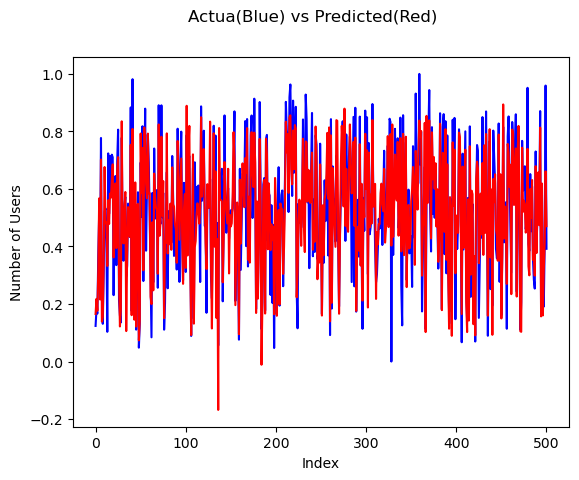

In [58]:
# Look how closely the actual and predicted values are
index = [i for i in range(0,len(X_train),1)]
plt.plot(index,y_train, color="blue")
plt.plot(index,y_train_pred, color="red")
plt.suptitle('Actua(Blue) vs Predicted(Red)')
plt.xlabel('Index')
plt.ylabel('Number of Users')
plt.show()

> - The actual and predicted values are very close.

From the above inferences, we can see clearly that the linear model assumption holds **good** for the best model.

---
---

<a id='prediction'></a>
## Step 8: Making Predictions Using the Final Model

Now that we have fit the model and checked the normality of error terms, let's make predictions and evaluate the model based on the best_model

In [59]:
# Apply scaler() to all the columns except categorical variables which are 0/1 columns
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
125,0,0,1,0.523386,0.518553,0.482924,0.578704,0.527612,0.171468,0,...,0,0,0,0,0,0,0,0,1,0
337,0,0,0,0.338555,0.354451,0.750150,0.173078,0.398412,0.462277,0,...,0,0,0,1,0,0,0,0,1,0
39,0,0,1,0.094267,0.085601,0.346003,0.467921,0.182121,0.053498,1,...,0,0,0,0,0,0,1,0,0,1
648,1,0,1,0.468352,0.462175,0.300778,0.447560,0.868385,0.888889,0,...,0,0,0,0,1,0,0,0,1,0
526,1,0,1,0.824514,0.762183,0.479929,0.520981,0.764151,0.721536,0,...,0,1,0,0,0,0,0,0,0,1


In [60]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,...,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.465116,0.023256,0.730233,0.543011,0.519047,0.564530,0.449961,0.514838,0.485118,0.246512,...,0.083721,0.139535,0.111628,0.134884,0.116279,0.172093,0.172093,0.037209,0.586047,0.376744
std,0.499946,0.151067,0.444875,0.231566,0.215979,0.207212,0.195358,0.223269,0.291025,0.431986,...,0.277615,0.347312,0.315643,0.342397,0.321307,0.378342,0.378342,0.189716,0.493690,0.485701
min,0.000000,0.000000,0.000000,0.060271,0.052856,0.086279,0.064693,0.078578,0.002743,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.335959,0.322142,0.411623,0.307695,0.349574,0.231139,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.530654,0.520215,0.571001,0.431817,0.501150,0.467764,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.747155,0.697145,0.705512,0.575184,0.693281,0.745542,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.970925,0.980934,1.032954,0.942311,0.937759,0.995885,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
# Load the test data into independant and dependant variable
y_test = df_test.pop('cnt')
X_test = df_test

# Select only the best predictors in test data set
X_test = X_test[best_predictors]

# Sample the dataset
X_test.head()

,temp,yr,holiday,weathersit_moderate,season_spring,mnth_sept,mnth_oct,weathersit_bad
125,0.523386,0,0,0,0,0,0,0
337,0.338555,0,0,0,0,0,0,0
39,0.094267,0,0,1,1,0,0,0
648,0.468352,1,0,0,0,0,1,0
526,0.824514,1,0,1,0,0,0,0


In [62]:
# Predict the test data values using the best model
y_test_pred = best_model.predict(X_test)

# Residual error for test data set
res_error_test = y_test - y_test_pred

---
---
<a id='evaluate'></a>
## Step 9: Model Evaluation

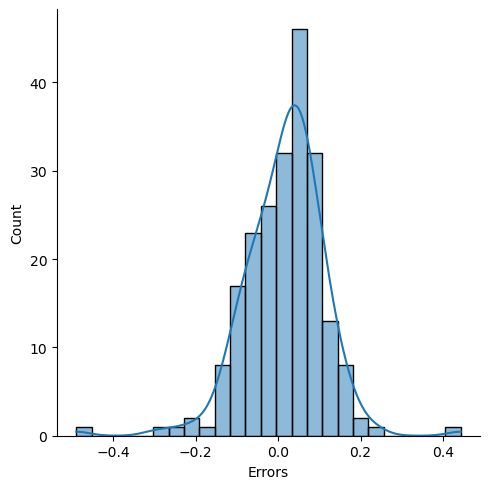

Residual error mean :  0.016034823127165112


In [63]:
# Plot the residual error
sns.displot(res_error_test, kde=True)
# X-label
plt.xlabel('Errors')
plt.show()

# Print the residual error mean
print("Residual error mean : ", res_error_test.mean())

> - Residual error is almost *normally distributed with a mean of almost 0 (0.01)*

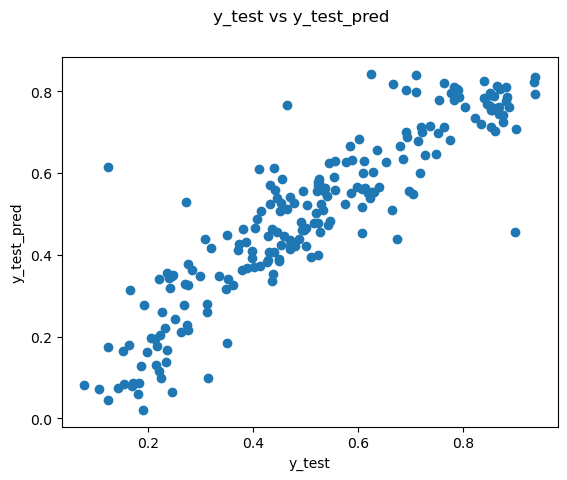

R2 score for test data:  0.8085498058518299


In [64]:
# Plotting y_test and y_test_pred to understand the spread
plt.scatter(y_test, y_test_pred)
plt.suptitle('y_test vs y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

# Find out the R squared value between test and predicted test data sets.
print("R2 score for test data: ", r2_score(y_true=y_test, y_pred=y_test_pred))

> - It is clear that the test data R2 score is **0.81** whereas for training data it is **0.82**. The *difference of 0.01* is acceptable. Hence the model did not overfit and has *generalized* the learning.
> - The residual errors do not have any significant deviation in spread of error values.

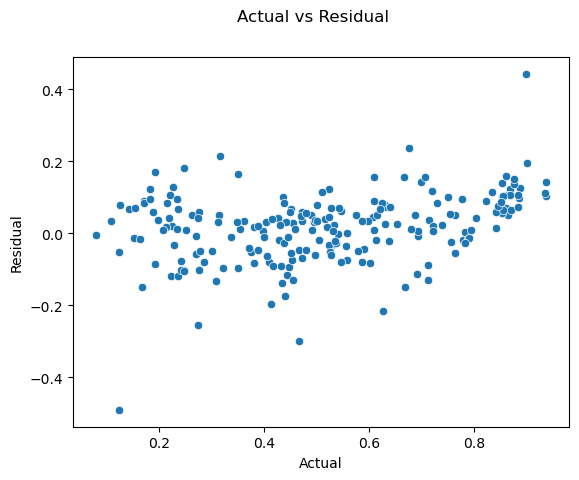

In [65]:
# Look if the error term is having any pattern with target variable
sns.scatterplot(x=y_test, y=res_error_test)
plt.suptitle('Actual vs Residual')
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.show()

> - The residual errors do not have any significant pattern with respect to target variable.

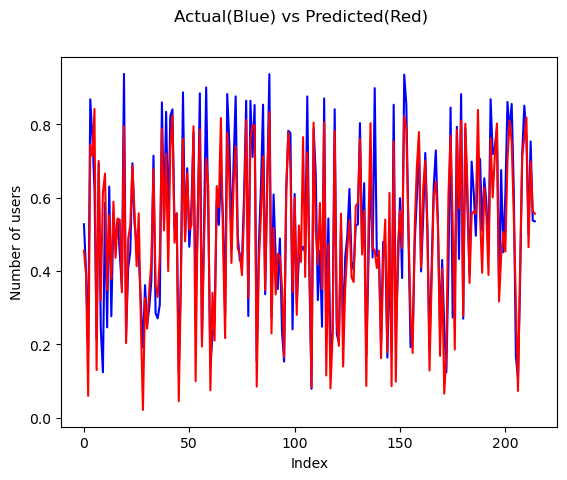

In [66]:
# Look how closely the actual and predicted values are
index = [i for i in range(0,len(X_test),1)]
plt.plot(index,y_test, color="blue")
plt.plot(index,y_test_pred, color="red")
plt.suptitle('Actual(Blue) vs Predicted(Red)')
plt.xlabel('Index')
plt.ylabel('Number of users')
plt.show()

> - The actual value is very close to predicted value.

From the above inferences, we can clearly see that the linear model created has **generalized** learning and could explain **82%** of variation in target variable.

---
---

<a id='conclusion'></a>
# Conclusion

By using **RFE approach and manual selection** for finding the predictors, we have derived the following conclusions.

In [67]:
print("Best predictors are (in no order) : ")
for item in best_predictors:
    print(item)

Best predictors are (in no order) : 
temp
yr
holiday
weathersit_moderate
season_spring
mnth_sept
mnth_oct
weathersit_bad


We have the list of predictors, but we do not know the rank of each predictor. Hence, lets rebuild the model using these predictors and rank the same for better understanding.

In [68]:
# Prepare the training data
X_train_best = df_train[best_predictors]
X_train_best.head()

,temp,yr,holiday,weathersit_moderate,season_spring,mnth_sept,mnth_oct,weathersit_bad
28,0.171197,0,0,0,1,0,0,0
43,0.320723,0,0,0,1,0,0,0
42,0.203567,0,0,0,1,0,0,0
76,0.599187,0,0,0,1,0,0,0
172,0.840090,0,0,0,0,0,0,0


In [69]:
# Create a linear regression object for RFE method
best_lr = LinearRegression()
best_lr.fit(X_train_best, y_train)

# Let's select 1 feature, so that the other features will be ranked in order
best_rfe = RFE(best_lr, n_features_to_select=1)
best_rfe = best_rfe.fit(X_train_best, y_train)

In [70]:
# Let us look into the columns selected by RFE and its ranking 
vis_rank = pd.DataFrame({'Ranking':best_rfe.ranking_,'Predictor':X_train_best.columns,'Coefficient':best_lr.coef_})
vis_rank = vis_rank.set_index('Ranking')
vis_rank = vis_rank.sort_index()

print('Intercept : ', best_lr.intercept_)
vis_rank

Intercept :  0.27214083391522237


,Predictor,Coefficient
Ranking,,
1,temp,0.351334
2,weathersit_bad,-0.342787
3,yr,0.230702
4,season_spring,-0.166929
5,holiday,-0.088471
6,mnth_sept,0.094459
7,weathersit_moderate,-0.078991
8,mnth_oct,0.076377


Based on these values, below is the multiple linear model equation:
                 
$ cnt = 0.272141 + \left( 0.351334 \times temp \right) - \left( 0.342787 \times weathersit\_bad \right) + \left( 0.230702 \times yr \right) - \left( 0.166929 \times season\_spring \right) - \left( 0.088471 \times holiday \right) + \left( 0.094459 \times mnth\_sept \right) - \left( 0.078991 \times weathersit\_moderate \right) + \left( 0.076377 \times mnth\_oct \right) $

*Note : The equation is dervied based on scaled values. So the output 'cnt' also will be on scaled range.*

---

`From the above ranking table, we can derive the following predictors as signifcant in order :`
1) Temperature
2) Weather
3) Year
4) Season
5) Holiday
6) Month

---

Below are few *inferences* from the analysis, the demand for bikes
1) *Increase* when temperature increase => The company can expect high demand during high temperature.
2) *Increase* every year => The company should focus on staying in business.
3) *Increase* around September and October month => The company should prepare to manage the demands.
4) *Decrease* during holidays => The company can promote offers, campaigns, tournament or etc. to make people use during the holidays.
5) *Decrease* during spring and when weather is not good => It might be because of difficulty for the user during these bad conditions which is not good for driving. Hence, company can focus on preparing for meeting higher demands later like servicing the bikes, repairing the bike docks etc.

---
---